In [52]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    accuracy_score, precision_score, recall_score, f1_score,
    roc_curve, roc_auc_score, RocCurveDisplay
)

## Opgave 1

In [53]:
file_name = "breast-cancer.csv"
breast_cancer_df = pd.read_csv(file_name)

# Konverter 'M' og 'B' til 1 og 0
breast_cancer_df["diagnosis"] = breast_cancer_df["diagnosis"].map({"M": 1, "B": 0})

# breast_cancer_df.info()
# breast_cancer_df.isna().sum()
# breast_cancer_df["diagnosis"].sum()
# breast_cancer_df.head()

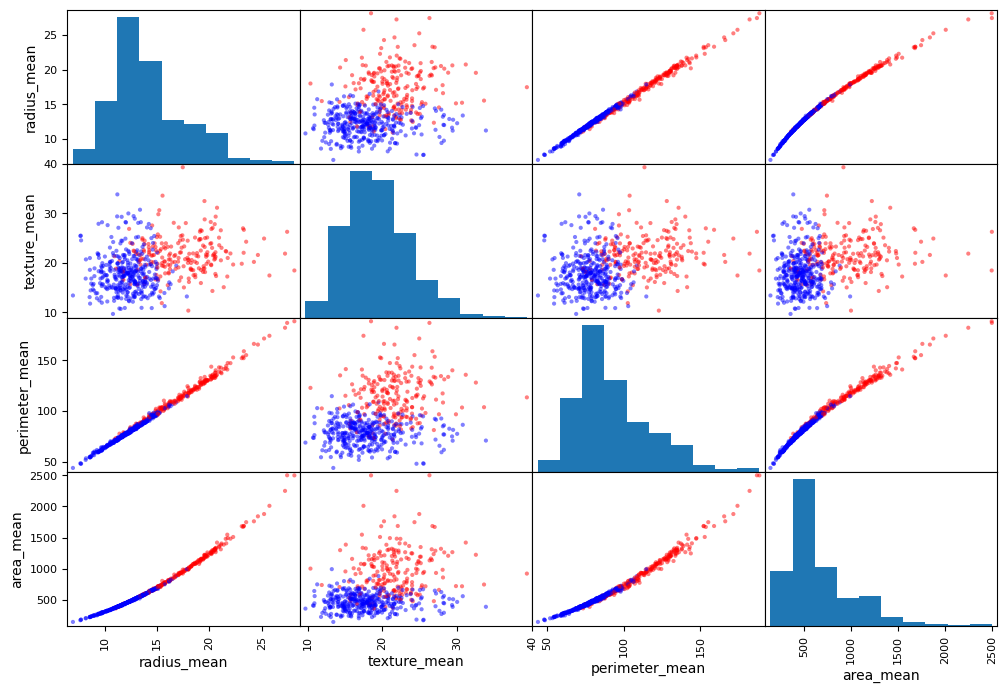

In [54]:
attributes = ["radius_mean", "texture_mean", "perimeter_mean", "area_mean"]
colors = breast_cancer_df["diagnosis"].map({0: "blue", 1: "red"})
scatter_matrix(
    breast_cancer_df[attributes],
    figsize=(12, 8),
    c=colors,
)
plt.show()

In [55]:
# Forbered data
X = breast_cancer_df.drop(columns=["id", "diagnosis"])
X = X[attributes]
y = breast_cancer_df["diagnosis"]

print("Features:", X.shape)
print("Outcome:", y.value_counts())

# Business as usual: split and scale data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Features: (569, 4)
Outcome: diagnosis
0    357
1    212
Name: count, dtype: int64


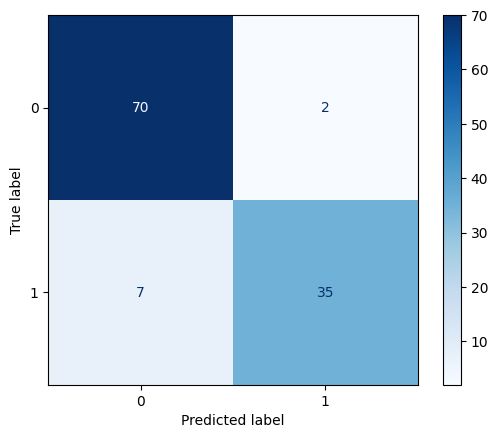

In [56]:
# Træn model
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")

## Prøv forskellige thresholds
# y_proba = model.predict_proba(X_test_scaled)[:, 1]
# threshold = 0.2
# y_pred_t = (y_proba >= threshold).astype(int)
# cm = confusion_matrix(y_test, y_pred_t)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm)
# disp.plot(cmap="Blues")

## Opgave 2

In [57]:
# Beregn confusion matrix
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.flatten()

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision (PPV):", precision_score(y_test, y_pred))
print("Recall (Sensitivity):", recall_score(y_test, y_pred))
print("Specificity:", tn / (tn + fp))
print("Negative Predictive Value (NPV):", tn / (tn + fn))
print("F1-score:", f1_score(y_test, y_pred))


Accuracy: 0.9210526315789473
Precision (PPV): 0.9459459459459459
Recall (Sensitivity): 0.8333333333333334
Specificity: 0.9722222222222222
Negative Predictive Value (NPV): 0.9090909090909091
F1-score: 0.8860759493670886


## Opgave 3

c:\Users\Anders\anaconda3\envs\medai\Lib\site-packages\sklearn\metrics\_plot\roc_curve.py:189: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")


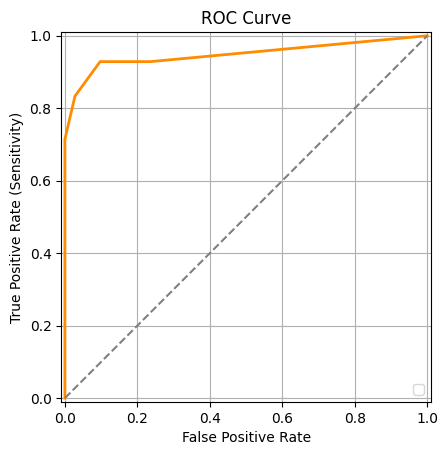

AUC (Area Under the Curve): 0.948


In [58]:
# Beregn sandsynligheder
y_proba = model.predict_proba(X_test_scaled)[:, 1]

# Beregn ROC-kurve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Plot ROC-kurve
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_display.plot(color="darkorange", linewidth=2)
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Diagonal reference
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.grid(True)
plt.show()

# Beregn AUC (Area Under the Curve)
auc_score = roc_auc_score(y_test, y_proba)
print(f"AUC (Area Under the Curve): {auc_score:.3f}")